In [2]:
import pandas as pd

column_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
#feature 13개

boston_pd = pd.read_csv('C:/Users/Gunyoung/Desktop/boston_house_price.csv',  sep = "\s+", names=column_name)
#sep은 ''기준으로 데이터를 자르겠다는 의미

In [3]:
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10, 8)})
plt.hist(boston_pd['PRICE'], bins = 30)
plt.xlabel("House prices in $1000")
plt.show()
#정규분포, 이상치 발견

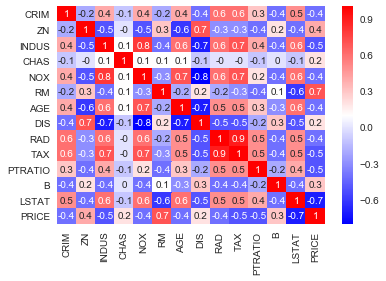

In [5]:
correlation_matrix = boston_pd.corr().round(1)
sns.heatmap(data = correlation_matrix, annot = True, cmap='bwr')
#annot,cmap 색깔만이 아니라 수치도 표현
#세로축 가로축은 feature들
#방의수(RM),저소득층 인구(LSTAT)가 높은 상관관계를 가짐

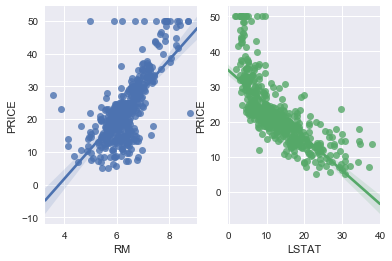

In [6]:
sns.set_style('darkgrid')
#seaborn-> 그래프를 이쁘게 그리기 위해 사용
fig, axs = plt.subplots(ncols = 2)
sns.regplot(x = 'RM', y = 'PRICE', data = boston_pd, ax = axs[0])
#regplot -> 산점도 + 회귀직선
sns.regplot(x = 'LSTAT', y = 'PRICE', data = boston_pd, ax = axs[1])

In [7]:
#저소득층 인구가 낮을수록, 방 수가 많을 수록 집 가격은 높아짐.

In [8]:
#방 갯수로 집가격 예측 모델 구축

In [9]:
import numpy as np

X_rooms = boston_pd['RM']
y_price = boston_pd['PRICE']

print(np.array(X_rooms).shape)
#np.shape-> 가로 세로의 크기를 알수 있음

(506,)


In [10]:
X_rooms = np.array(X_rooms).reshape(-1, 1)
#np.reshape -> 행과 열 변형/ 1개의 feature만 불러와서 사용 2개 이상이면 reshape안해도됨?
print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506,)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X_rooms, y_price,
                 test_size = 0.2,
                 random_state = 77)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(404, 1)
(102, 1)
(404,)
(102,)


In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
#빈껍질 만든다. (아무직선을 만듬)
reg.fit(X_train, y_train)
#MSE를 활용

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
from sklearn.metrics import mean_squared_error

y_train_predict = reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print("RMSE is ", rmse)
#훈련용데이터 평가

The model performance for training set
--------------------------------------
RMSE is  6.773930079666117


In [14]:
y_test_predict = reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for test set")
print("--------------------------------------")
print("RMSE is ", rmse)
#훈련용보다 테스트 데이터의 평가가 더 중요
#에러가 작은게 더 좋은 모델이다.

The model performance for test set
--------------------------------------
RMSE is  5.885123878168727


In [15]:
#과적합이 아니고 어느정도 추세를 따른다고 할 수 잇음

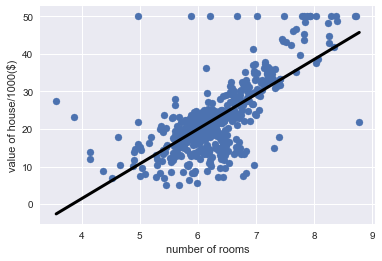

In [17]:
# 값을 넣으면 예측값이 나온다.
prediction_space = np.linspace(min(X_rooms), max(X_rooms))
# 최소값, 최대값 사이의 연속된 값들을 의미
plt.scatter(X_rooms, y_price)
# prediction_space를 2차원 배열로 변환
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)
plt.plot(prediction_space, reg.predict(prediction_space),
         color = 'black', linewidth = 3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()

In [18]:
X = boston_pd.drop('PRICE', axis = 1)
#PRICE만 지우고 나머지 저장
y = boston_pd['PRICE']
#PRICE만 저장
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2,
                 random_state = 77)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
#훈련용데이터로 학습

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print("RMSE is ", rmse)
#feature를 더많이 사용할 수록 성능이 개선되는 것을 볼 수 있음

The model performance for training set
--------------------------------------
RMSE is  4.780762027920525


In [20]:
y_test_predict = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for test set")
print("--------------------------------------")
print("RMSE is ", rmse)

The model performance for test set
--------------------------------------
RMSE is  4.35077560098352


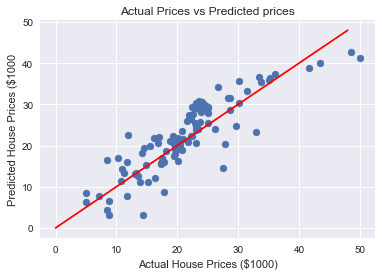

In [21]:
    plt.scatter(y_test, y_test_predict)
    plt.xlabel("Actual House Prices ($1000)")
    plt.ylabel("Predicted House Prices ($1000")
    plt.title("Actual Prices vs Predicted prices")
    plt.plot([0, 48], [0, 48], 'r')
    #가로:실제가격,세로:예측된 가격
    # 직선에 멀어질수록 실제값과 예측값이 괴리가있다.